#Recurrent Neural Networks

인간은 매초마다 항상 생각하지 않는다. Essay를 읽을 때에도, 우리는 이전의 단어들에 대한 이해를 바탕으로 각각의 단어들을 이해한다. 모든 것을 버리고 항상 처음부터 생각하지 않는다.

전통적인 신경망(예를 들어, CNN 등)은 이것을 할 수 없고, 치명적인 단점으로 작용된다. 예를 들어, 영화의 모든 지점에서 어떤 종류의 사건이 일어나는지 분류하고 싶을 때, 전통적인 신경망은 영화 내 이전 사건에 대한 추론이 이후의 사건들에 대한 추론에 사용될지 불분명하다.

RNN은 이 문제를 해결하며, 그들은 정보가 지속되도록하는 loops가 있는 네트워크다.

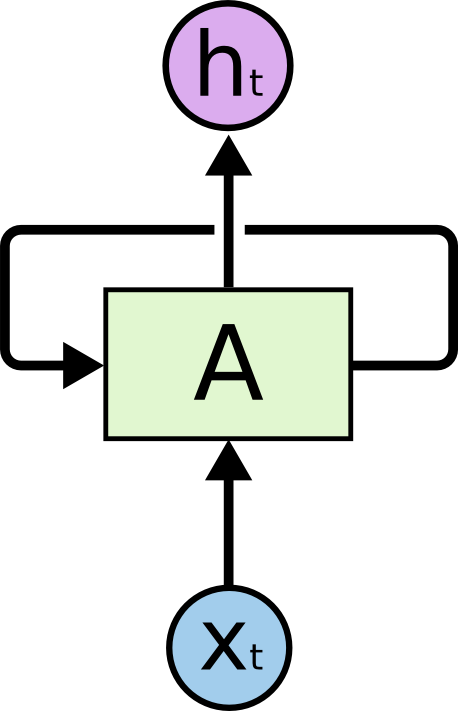

위 다이어그램에서 신경망의 덩어리인 A는 일부 입력 Xt를 보고 값 ht를 출력한다. loops는 네트워크의 한 단 계에서 다음 단계로 정보를 전달할 수 있게 한다.

이 고리들은 반복되는 신경망을 시닙롭게 보이게 한다. 하지만, 그것들이 모두 일반적인 신경망과 크게 다르지 않다. RNN은 동일안 네트워크의 여러 복사본으로 생각할 수 있고, 각각의 출력물은 후임자에게 전달된다.
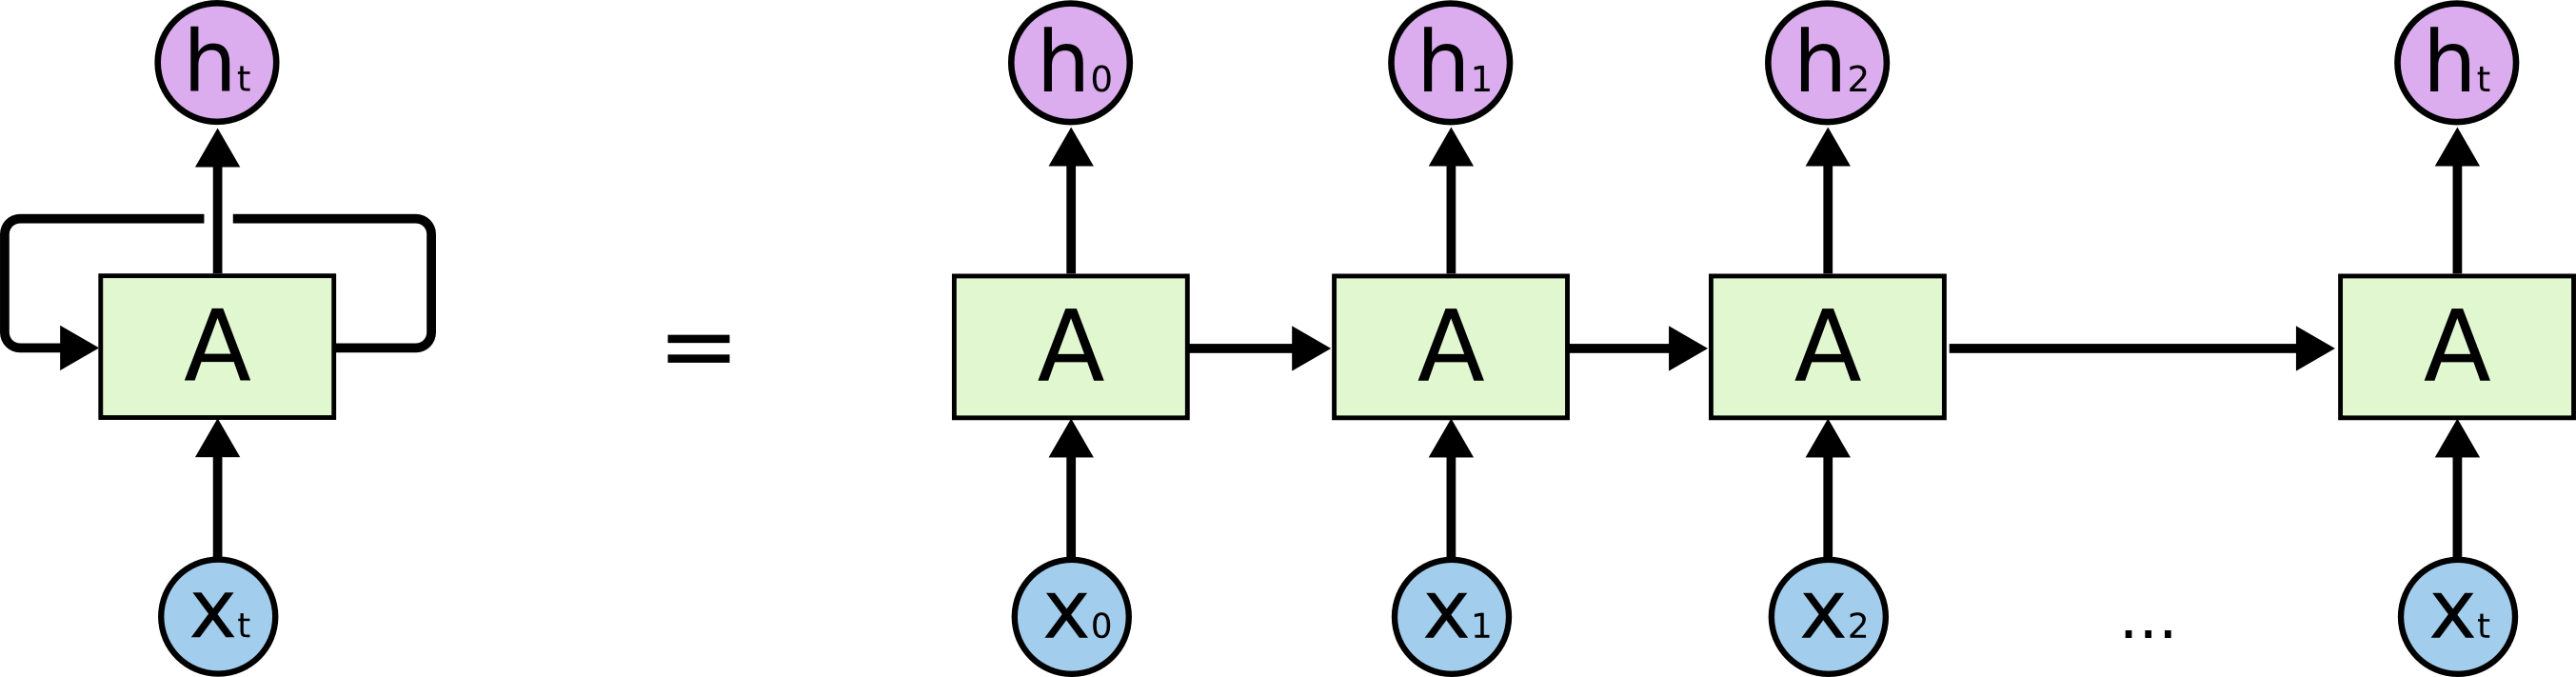


이러한 사슬과 같은 특성은 RNN이 Sequence 및 Lists와 밀접하게 연관되어 있음을 보여준다. 그것들은 그러한 데이터에 사용하기 위한 신경망의 자연스러운 구조이다. 지난 몇 년 간 음성 인식, 언어 모델링, 번역, 이미지 캡션 등 다양한 문제에서 RNN은 놀라운 성공을 거두웠다. 

그리고 이러한 성공의 필수적인 것은 "LSTM"이었다.


# The Problem of Long-Term Dependencies

RNN의 매력 중 하나는 이전 비디오 프레임을 사용하는 것과 같이 이전 정보를 현재 작업에 연결할 수 있다는 생각이다.

하지만 때로는 현재 작업을 수행하기 위해 최근 작업만 보면 되는 작업도 있다. 예를 들어, 언어 모델이 이전 단어를 기반으로 다음 단어를 예측한다고 할 때, 만약 우리가 "구름은 하늘에 있다"의 마지막 단어를 예측하려고 한다면, 우리는 더 이상의 문맥이 필요하지 않다. 다음 단어는 하늘이 될 것이 분명하기 때문이다. 이러한 경우, 관련 정보와 필요한 장소 사이의 간격이 작은 경우, rnn은 과거 정보의 사용을 배울 수 있다. 하지만 문맥이 필요할 경우, 관련 정보가 더 먼 곳에서 있을 수 있고, 그 격차가 커짐에 따라 rnn은 정보를 연결하기 어려워진다.

#LSTM Networks

Long Short Term Memory Networks는 장기 의존성을 학습할 수 있는 특별한 종류의 RNN이다. 1997년 Hochreiter & Schmidhuber에 의해 소개되었다. 

LSTM은 장기적인 의존성 문제를 피하기 위해 명시적으로 설계되었다. 오랜 시간 동안 정보를 기억하는 것은 사실상 그들의 기본적인 행동이다. 모든 RNN은 신경망의 반복 모듈 체인의 형태를 갖는다. 표준 RNN에서 이 반복 모듈은 단일 tahn 층과 같은 매우 단순한 구조를 가진다.
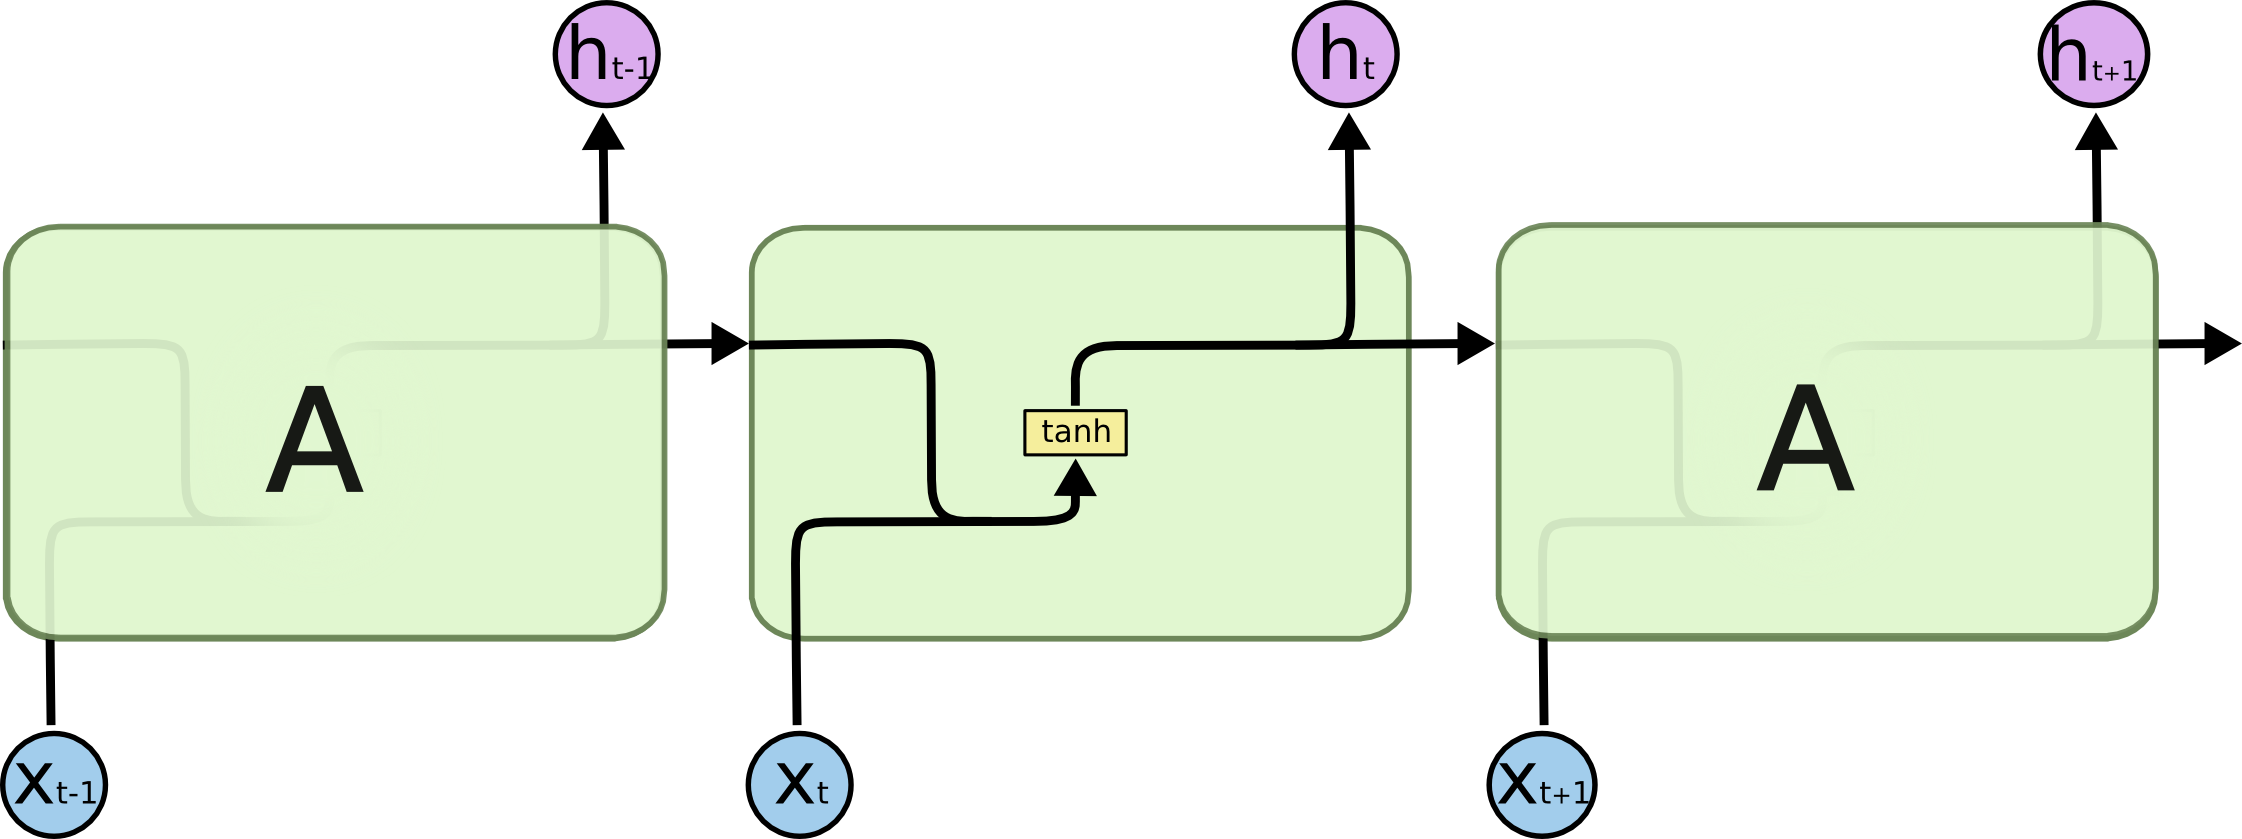


The repeating module in a standard RNN contains a single layer.

LSTM은 또한 이러한 체인과 같은 구조를 가지고 있지만, 반복 모듈은 다른 구조를 가지고 있다. 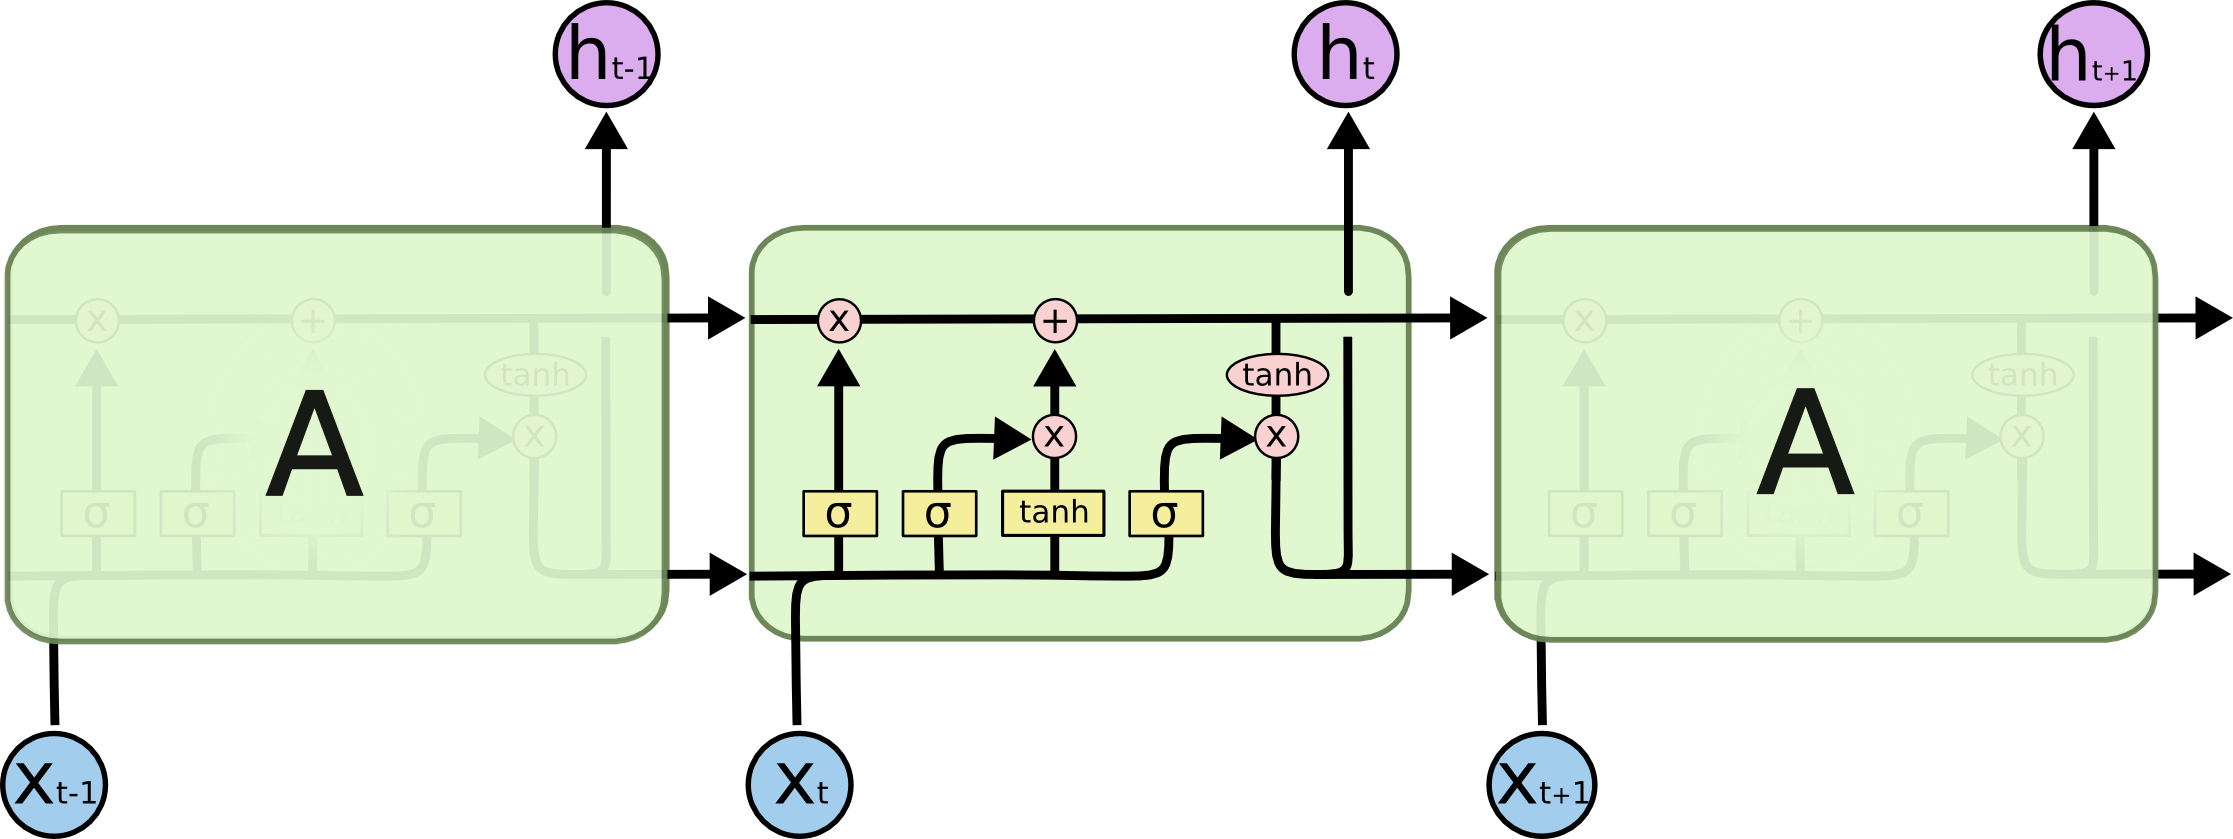

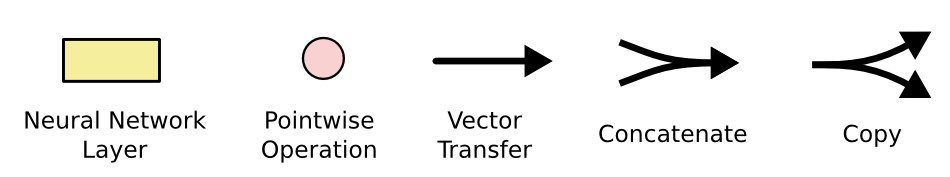

위의 다이어그램에서 각 선은 한 노드의 출력에서 다른 노드의 입력에 이르기까지 전체 벡터를 전달한다. 분홍색 원은 벡터 추가와 같은 점별 연산을 나타내는 반면, 노란색 상자는 학습된 신경망 레이어다. 라인 병합은 연결을 의미하며, 라인 포킹은 복사되는 내용과 복사본이 다른 위치로 이동함을 나타낸다.



# The Core Idea Behind LSTMs


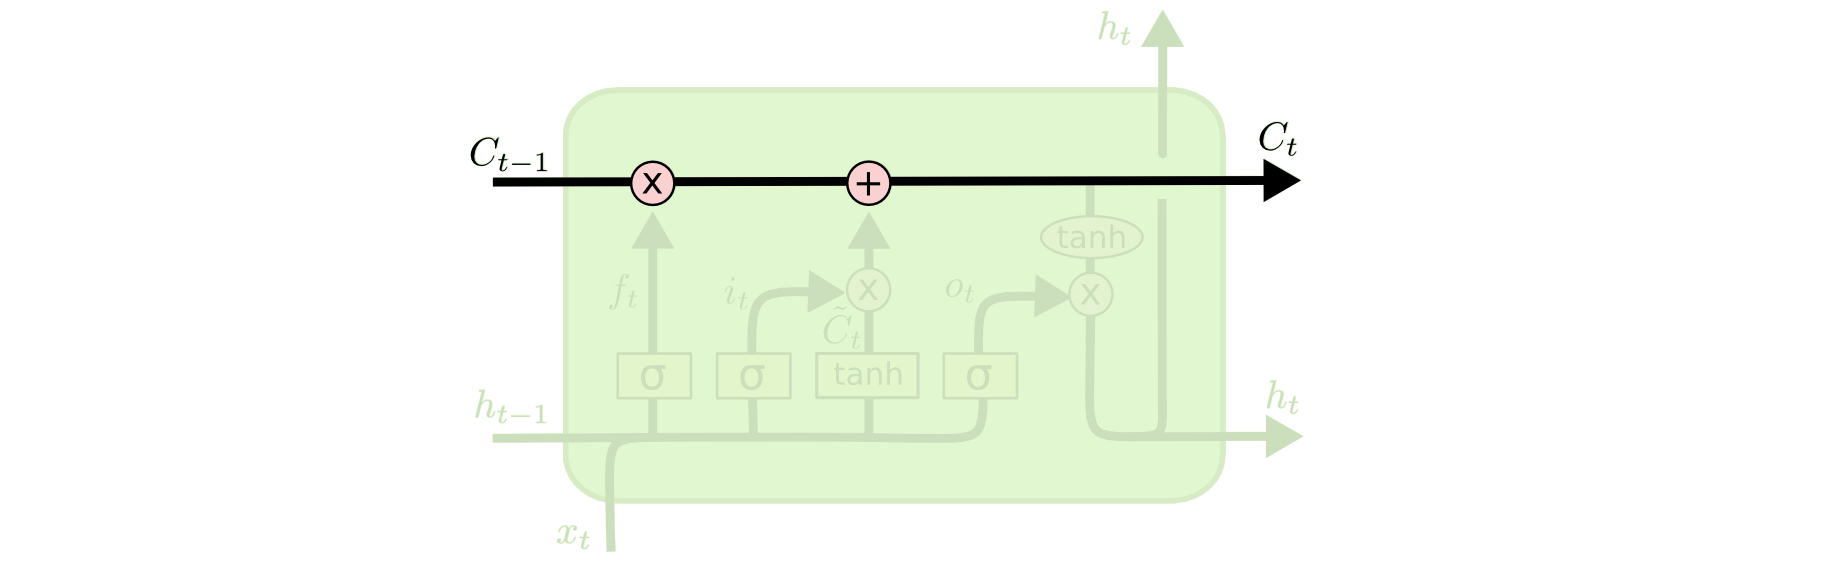


LSTM의 핵심은 다이어그램의 상단을 통과하는 수평선인 CELL 상태이다.

CELL 상태는 일종의 컨베이어 벨트와 같다. 정보가 변경되지 않고 그대로 흐르기는 매우 쉽다.

LSTM은 게이트라고 불리는 구조에 의해 신중하게 조절되는 CELL 상태에 정보를 제거하거나 추가하는 기능을 가지고 있다. 게이트는 선택적으로 정보를 통과시키는 방법이다. 그들은 Sigmoid 신경망 계층과 점별 곱셈 연산으로 구성된다

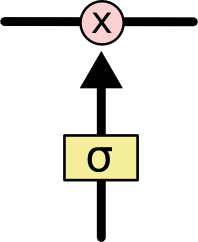

sigmoid 층은 0과 1 사이의 숫자를 출력하는데, 이는 각 구성 요소가 얼마나 많이 통과디어야 하는지를 설명한다. 값이 0이면 "통과 x", 값이 1이면 "통과"가 되게 하라는 뜻이다. LSTM에서는 cell 상태를 보호하고 제어하기 위해 이러한 게이트가 3개 있습니다.


# Step-by-Step LSTM Walk Through

LSTM의 첫 번째 단계는 셀 상태에서 어떤 정보를 버릴지 결정하는 것입니다. 이 결정은 "forget gate layer"라고 불리는 sigmoid 레이어에 의해 내려집니다. 이것은 ht-1과 xt를 보고 셀 상태 Ct-1의 각 숫자에 대해 0과 1 사이의 숫자를 출력한다. 1은 "이것을 완전히 보관한다"를 나타내고 0은 "이것을 완전히 제거한다"를 나타냅니다.

이전의 모든 단어들을 바탕으로 다음 단어를 예측하려는 언어 모델의 예시로 돌아가 봅시다. 이러한 문제에서 셀 상태는 정확한 대명사를 사용할 수 있도록 현재 주어의 성별을 포함할 수 있다. 우리가 새로운 주제를 볼 때, 우리는 오래된 주제의 성별을 잊고 싶다.
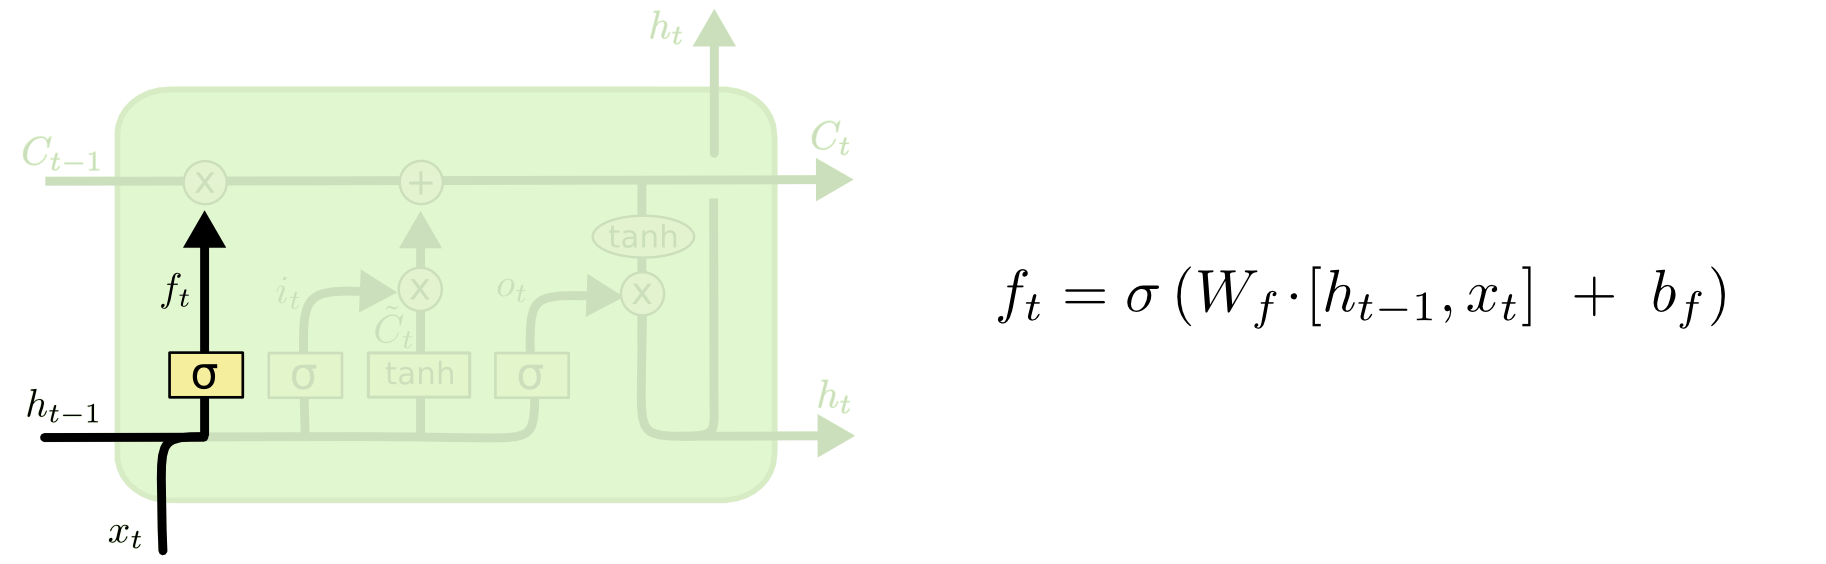


다음 단계는 Cell 상태에 저장할 새로운 정보를 결정하는 것입니다. 이것은 두 부분으로 되어 있다. 먼저, "Input Gate Layer"라고 불리는 Sigmoid 레이어가 우리가 업데이트할 값을 결정합니다. 다음으로, tanh 층은 상태에 추가될 수 있는 새로운 후보 값 C~t의 벡터를 생성한다. 다음 단계에서는 이 두 가지를 결합하여 상태에 대한 업데이트를 만듭니다.

우리의 언어 모델의 예에서, 우리는 우리가 잊고 있는 오래된 것을 대체하기 위해 새로운 주어의 성별을 cell 상태에 추가하고 싶습니다.

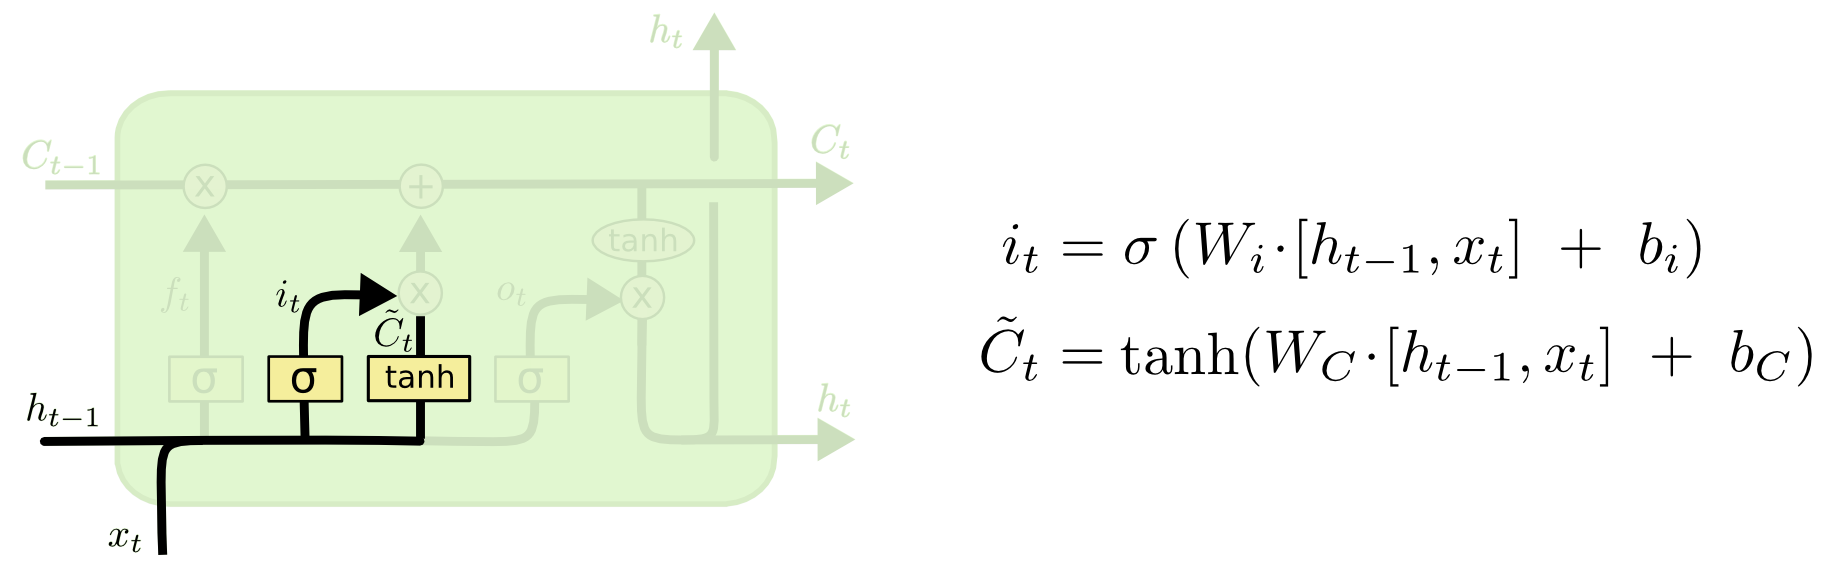

이제 이전 Cell 상태인 Ct-1을 새로운 Cell 상태 Ct로 업데이트할 시간입니다. 이전 단계에서 이미 무엇을 해야 할지 결정했다.

우리는 이전 상태를 ft로 곱하여 앞서 잊기로 결정한 것들을 잊는다. 그런 다음 tC~t를 추가합니다. 이것은 각 상태 값을 업데이트하기로 결정한 양에 따라 조정된 새로운 후보 값입니다.

언어 모델의 경우, 이전 단계에서 결정한 것처럼, 여기서 우리는 오래된 주어의 성별에 대한 정보를 삭제하고 새로운 정보를 추가합니다.

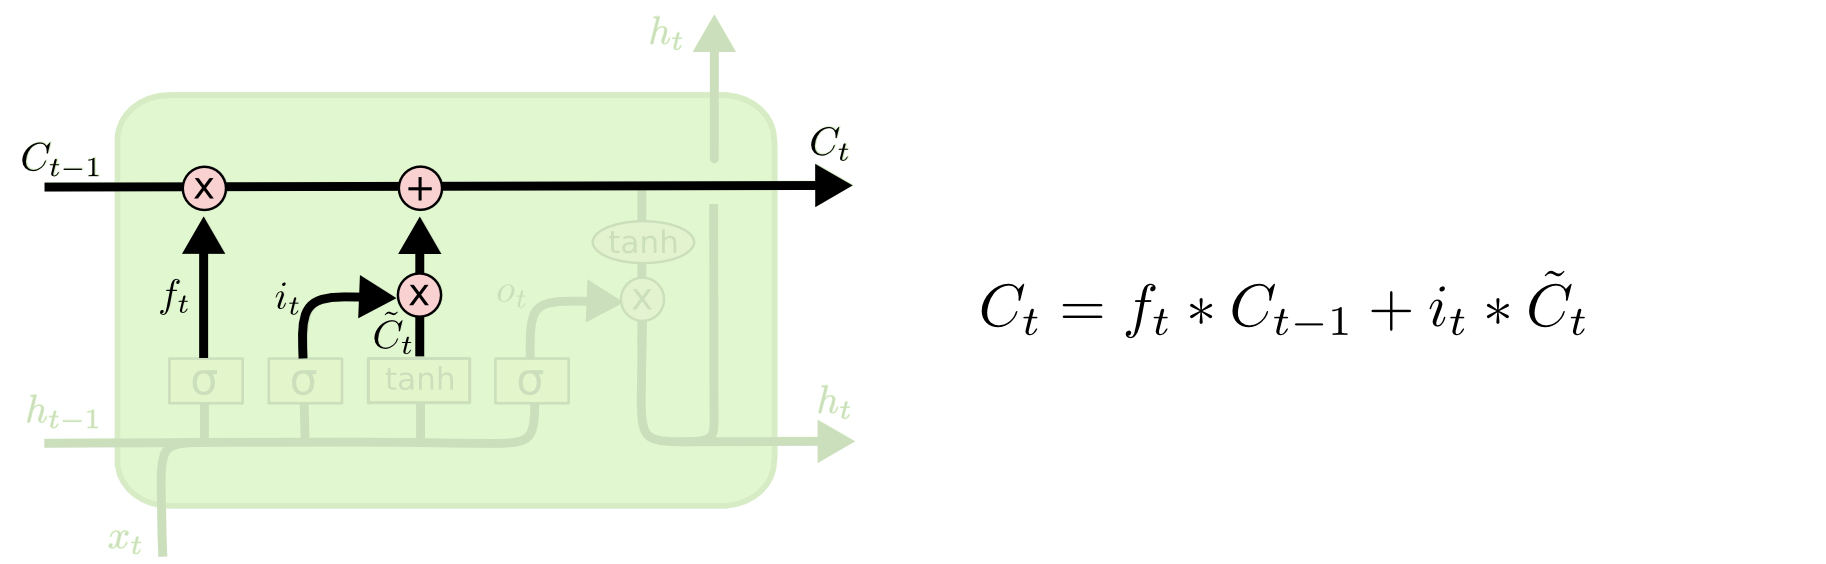

마지막으로, 우리는 무엇을 출력할지 결정해야 합니다. 이 출력은 Cell 상태를 기반으로 하지만 필터링된 버전이 됩니다. 먼저, 우리는 Cell 상태의 어떤 부분을 출력할 것인지를 결정하는 시그모이드 층을 실행합니다. 그런 다음 셀 상태를 tanh(-1과 1) 사이로 밀어넣고 S자형 게이트의 출력으로 곱하여 우리가 결정한 부분만 출력한다.

언어 모델 예제의 경우 주어를 방금 보았기 때문에 다음에 나올 동사와 관련된 정보를 출력하려고 할 수 있습니다. 예를 들어, 주어가 단수형인지 복수형인지를 출력할 수 있기 때문에 동사가 다음에 어떤 형태로 활용되어야 하는지 알 수 있다.

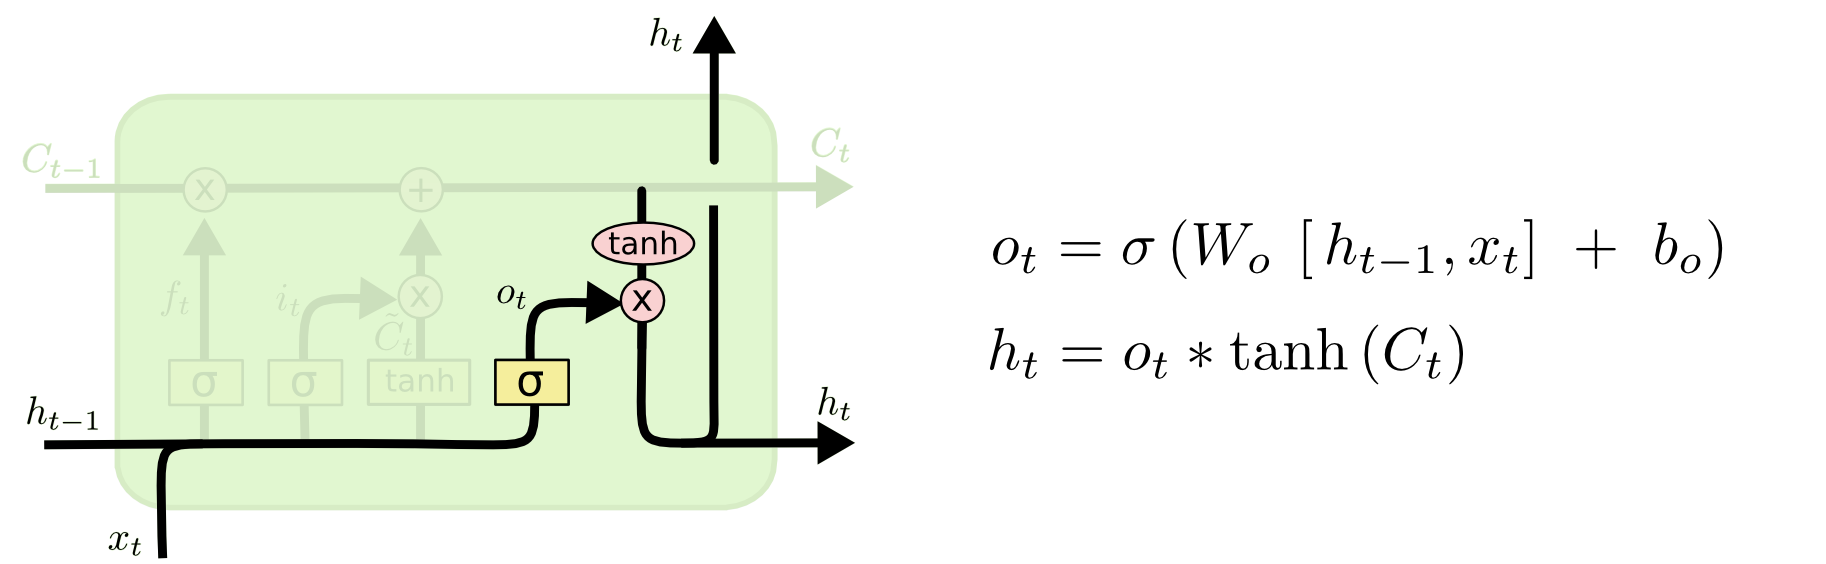

# Variants on Long Short Term Memory

지금까지 설명한 것은 일반적인 LSTM입니다. 그러나 모든 LSTM이 위와 동일한 것은 아닙니다. 사실 LSTM과 관련된 거의 모든 논문은 약간 다른 버전을 사용하는 것 같다. 그 차이는 미미하지만, 그 중 몇 가지는 언급할 가치가 있다.

Gers & Schmidhuber (2000)에 의해 소개된 인기 있는 LSTM 변형 중 하나는 "peephole connections"을 추가하는 것이다. 이것은 gate 레이어가 cell 상태를 보도록 한다는 것을 의미합니다.

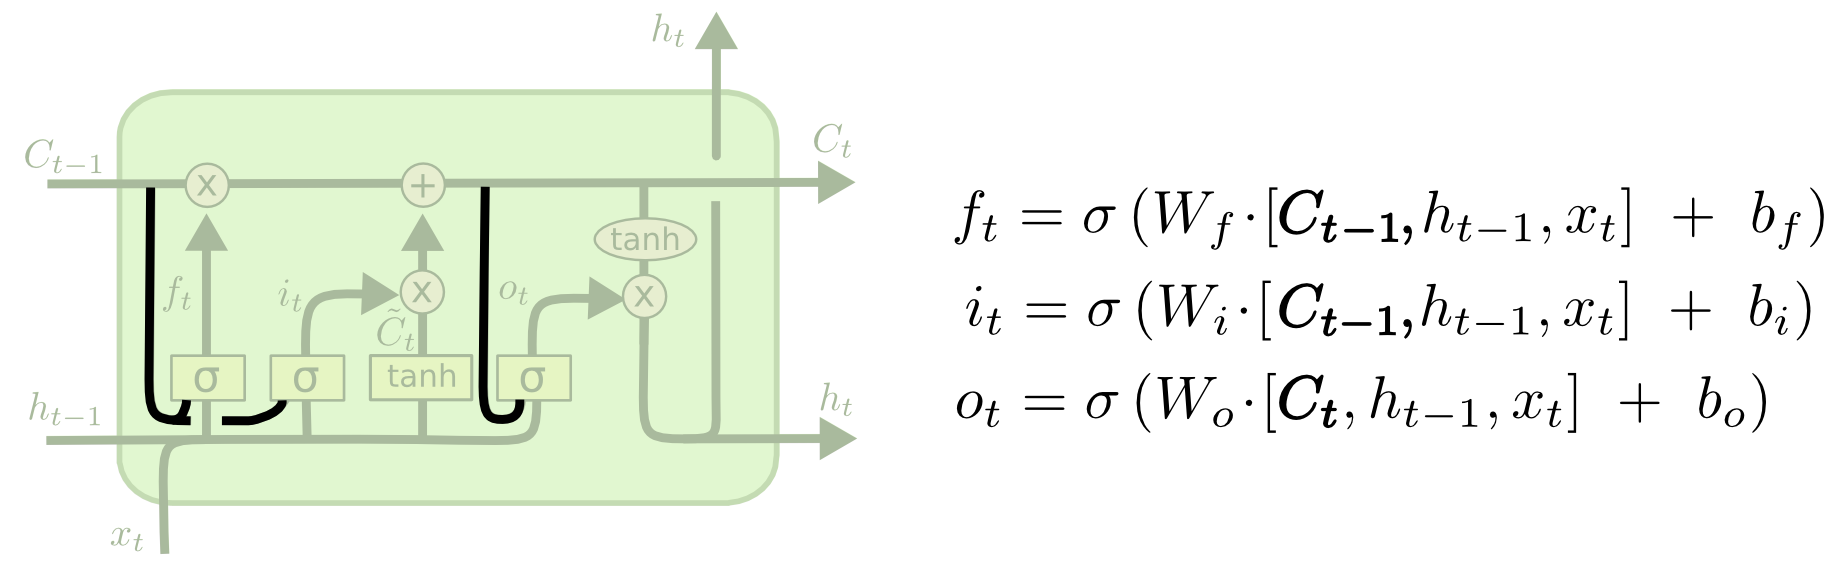

위의 도표는 모든 게이트에 peepholes을 추가하지만, 많은 논문이 다른 것이 아닌 일부 peepsholes를 제공할 것이다.

또 다른 변형은 결합된 forget 및 iput 게이트를 사용하는 것이다. 잊어버릴 것과 새로운 정보를 추가해야 할 것을 별도로 결정하는 대신, 함께 결정을 내린다. 우리는 그 자리에 무언가를 입력할 때만 잊어버립니다. 더 오래된 것을 잊어버렸을 때에만 새로운 가치를 입력한다.

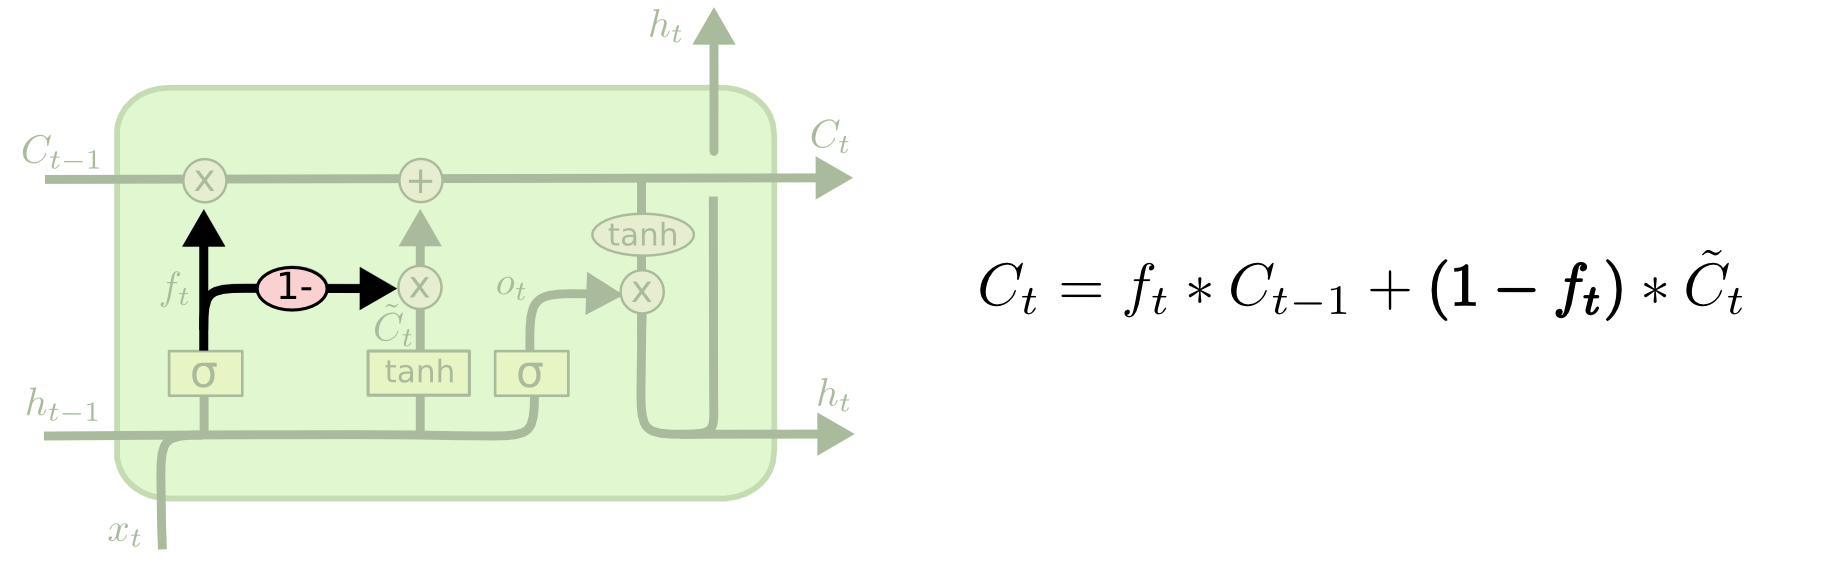

LSTM에서 더 극적인 변형은 Cho 등이 도입한 게이트 순환 장치(GRU)이다(2014). 그것은 forget 게이트와 input 게이트를 하나의 "update 게이트"로 결합한다. 또한 cell 상태와 hidden 상태를 병합하고 다른 내용을 변경합니다. 결과 모델은 표준 LSTM 모델보다 단순하며, 점점 더 인기를 얻고 있다.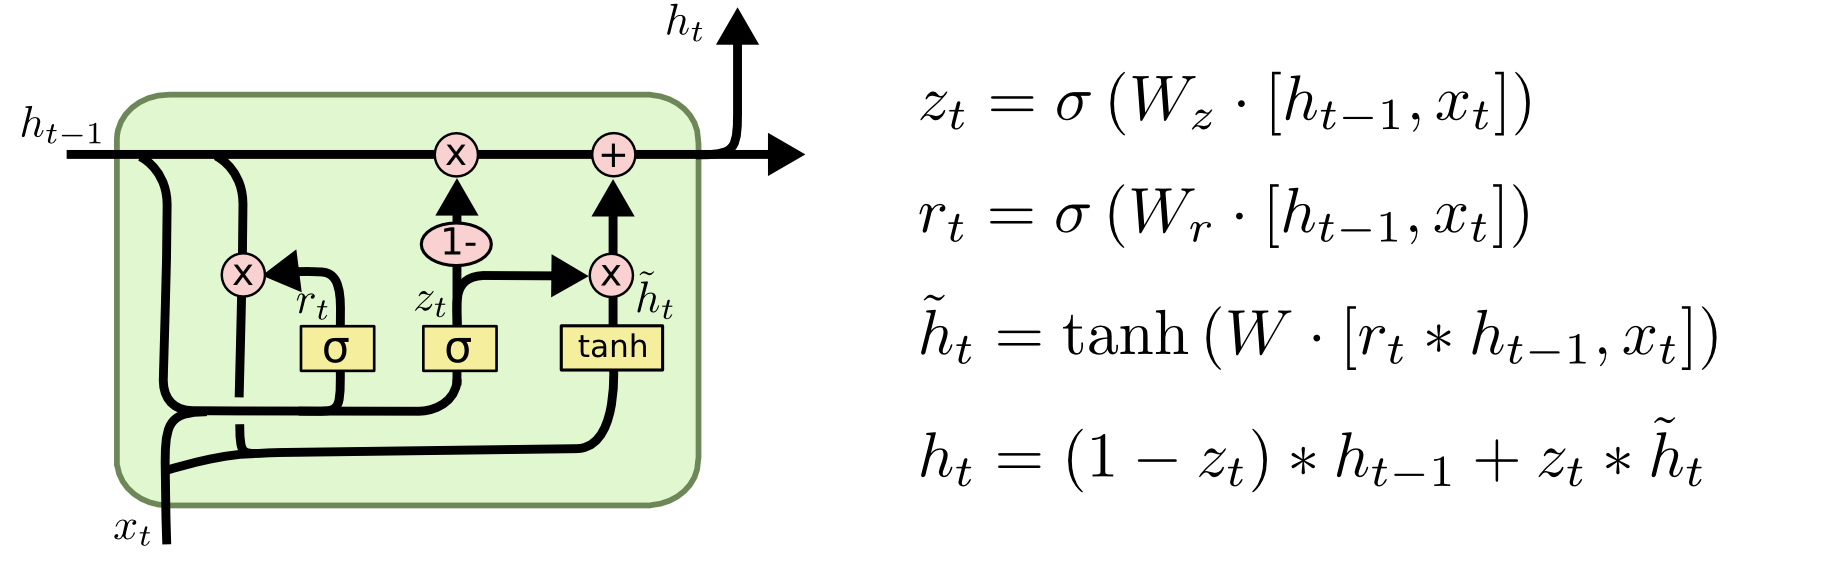

이것들은 가장 주목할 만한 LSTM 변형들 중 몇 가지에 불과하다. 야오 등의 depth gated RNNS(2015)과 같은 많은 다른 것들이 있다. 또한 Koutnik 등의 Clockwork RNN(2014)과 같이 장기 의존성을 해결하기 위한 완전히 다른 접근 방식이 있다.

Greff, et al. (2015)은 인기 있는 후기 모델들을 잘 비교해서 그것들이 모두 비슷하다는 것을 발견했다. Jozefowicz 등(2015)은 10,000개 이상의 RNN 아키텍처를 테스트하여 특정 작업에서 LSTM보다 더 잘 작동하는 아키텍처를 발견했다.